# Lecture 2. Matrix norms and unitary matrices

## Recap of the previous lecture

- Floating point  (double, single, half precisions, number of bytes), rounding error
- Vector norms are measures of smallness, used to compute the distance and accuracy
- Forward/backward error (and stability of algorithms)

## Notations

We use notation 

$$A= \begin{bmatrix} a_{11} & \dots & a_{1m} \\ \vdots & \ddots & \vdots \\ a_{n1} & \dots & a_{nm}  \end{bmatrix} \equiv \{a_{ij}\}_{i,j=1}^{n,m}\in \mathbb{C}^{n\times m}.$$

$A^*\stackrel{\mathrm{def}}{=}\overline{A^\top}$.

## Matrices and norms

- Recall vector norms that allow to evaluate distance between two vectors or how large are elements of a vector.

- How to generalize this concept to matrices?

- A trivial answer is that there is no big difference between matrices and vectors, and here comes the simplest matrix norm –– **Frobenius** norm:

$$ \Vert A \Vert_F \stackrel{\mathrm{def}}{=} \Big(\sum_{i=1}^n \sum_{j=1}^m |a_{ij}|^2\Big)^{1/2} $$

## Matrix norms
$\Vert \cdot \Vert$ is called a **matrix norm** if it is a vector norm on the vector space of $n \times m$ matrices:
1. $\|A\| \geq 0$ and if $\|A\| = 0$ then $A = O$
3. $\|\alpha A\| = |\alpha| \|A\|$
4. $\|A+B\| \leq \|A\| + \|B\|$ (triangle inequality)

Additionally some norms can satisfy the *submultiplicative property*

* <span style="color:red"> $\Vert A B \Vert \leq \Vert A \Vert \Vert B \Vert$ </span>

- These norms are called **submultiplicative norms**.

- The submultiplicative property is needed in many places, for example in the estimates for the error of solution of linear systems (we will cover this topic later). 

- Example of a non-submultiplicative norm is Chebyshev norm 

$$ \|A\|_C = \displaystyle{\max_{i,j}}\, |a_{ij}| $$

## Operator norms

- The most important class of the matrix norms is the class of **operator norms**. They are defined as

$$ \Vert A \Vert_{*,**} = \sup_{x \ne 0} \frac{\Vert A x \Vert_*}{\Vert x \Vert_{**}}, $$

where $\Vert \cdot \Vert_*$ and $\| \cdot \|_{**}$ are **vector norms**.

- It is easy to check that operator norms are submultiplicative if $\|\cdot\|_* = \|\cdot\|_{**}$. Otherwise, it can be non-submultiplicative, think about example.

- **Frobenius norm** is a matrix norm, but not an operator norm, i.e. you can not find $\Vert \cdot \Vert_*$ and $\| \cdot \|_{**}$ that induce it. 
- This is a nontrivial fact and the general criterion for matrix norm to be an operator norm can be found in [Theorem 6 and Corollary 4](http://www.sciencedirect.com/science/article/pii/S0024379515004346).
For $\Vert \cdot \Vert_* = \| \cdot \|_{**}$ let us check on the blackboard!

## Matrix $p$-norms

Important case of operator norms are matrix $p$-norms, which are defined for $\|\cdot\|_* = \|\cdot\|_{**} = \|\cdot\|_p$. <br>

Among all $p$-norms three norms are the most common ones:  

- $p = 1, \quad \Vert A \Vert_{1} = \displaystyle{\max_j \sum_{i=1}^n} |a_{ij}|$.

- $p = 2, \quad$ spectral norm, denoted by $\Vert A \Vert_2$.

- $p = \infty, \quad \Vert A \Vert_{\infty} = \displaystyle{\max_i \sum_{j=1}^m} |a_{ij}|$.

Let us check it for $p=\infty$ on a blackboard.

## Spectral norm

- Spectral norm, $\Vert A \Vert_2$ is one of the most used matrix norms (along with the Frobenius norm). 
- It can not be computed directly from the entries using a simple formula, like the Frobenius norm, however, there are efficient algorithms to compute it.  
- It is directly related to the **singular value decomposition** (SVD) of the matrix. It holds

$$ \Vert A \Vert_2 = \sigma_1(A) = \sqrt{\lambda_\max(A^*A)} $$

where $\sigma_1(A)$ is the largest singular value of the matrix $A$ and $^*$ is a *conjugate transpose* of the matrix. 

- We will soon learn all about the SVD. Meanwhile, we can already compute the norm in Python.

In [1]:
import jax.numpy as jnp
import jax
n = 100
m = 2000
a = jax.random.normal(jax.random.PRNGKey(0), (n, m)) #Random n x m matrix
s1 = jnp.linalg.norm(a, 2) #Spectral
s2 = jnp.linalg.norm(a, 'fro') #Frobenius
s3 = jnp.linalg.norm(a, 1) #1-norm
s4 = jnp.linalg.norm(a, jnp.inf) 
print('Spectral: {0:} \nFrobenius: {1:} \n1-norm: {2:} \ninfinity: {3:}'.format(s1, s2, s3, s4))

Spectral: 54.296875 
Frobenius: 447.29681396484375 
1-norm: 109.08097839355469 
infinity: 1655.1561279296875


## Examples

Several examples of optimization problems where matrix norms arise:
* <span style="color:red"> $\displaystyle{\min_{\mathrm{rank}(A_r)=r}}\| A - A_r\|$ </span> –– finding best rank-r approximation. SVD helps to solve this problem for $\|\cdot\|_2$ and $\|\cdot\|_F$.


* $\displaystyle{\min_B}\| P_\Omega \odot(A - B)\| + \mathrm{rank}(B)$ –– matrix completion. 

$$ (P_\Omega)_{ij} = \begin{cases} 1 & i,j\in\Omega \\ 0 & \text{otherwise}, \end{cases} $$

where $\odot$ denotes Hadamard product (elementwise)


* $\displaystyle{\min_{B,C\geq 0}} \|A - BC\|_F$ –– nonnegative matrix factorization. Symbol $B\geq0$ here means that all elements of $B$ are nonnegative.

## Scalar product
While norm is a measure of distance, the **scalar product** takes angle into account.  

It is defined as

* **For vectors:**
$$ (x, y) =  x^* y = \sum_{i=1}^n \overline{x}_i y_i, $$
where $\overline{x}$ denotes the *complex conjugate* of $x$. The Euclidean norm is then

$$ \Vert x \Vert_2 = \sqrt{(x, x)}, $$

or it is said the norm is **induced** by the scalar product.  


* **For matrices** (Frobenius scalar product):

$$ (A, B)_F = \displaystyle{\sum_{i=1}^{n}\sum_{j=1}^{m}} \overline{a}_{ij} b_{ij} \equiv \mathrm{trace}(A^* B), $$

where $\mathrm{trace}(A)$ denotes the sum of diagonal elements of $A$. One can check that $\|A\|_F = \sqrt{(A, A)_F}$.

**Remark**. The angle between two vectors is defined as

$$ \cos \phi = \frac{(x, y)}{\Vert x \Vert_2 \Vert y \Vert_2}. $$

Similar expression holds for matrices.

- An important property of the scalar product is the **Cauchy-Schwarz-Bunyakovski inequality**:

$$|(x, y)| \leq \Vert x \Vert_2 \Vert y \Vert_2,$$

and thus the angle between two vectors is defined properly.

## Matrices preserving the norm

- For stability it is really important that the error does not grow after we apply some transformations. 

- Suppose you are given $\widehat{x}$ –– the approximation of $x$ such that,  

$$ \frac{\Vert x - \widehat{x} \Vert}{\Vert x \Vert} \leq \varepsilon. $$

- Let us calculate a linear transformation of $x$ and $\widehat{x}$:  

$$ y = U x, \quad \widehat{y} = U \widehat{x}. $$

- When building new algorithms, we want to use transformations that do not increase (or even preserve) the error:

$$ \frac{\Vert y - \widehat{y} \Vert}{\Vert y \Vert } = \frac{\Vert U ( x - \widehat{x}) \Vert}{\Vert U  x\Vert}  \leq \varepsilon. $$

- The question is for which kind of matrices the norm of the vector **will not change**, so that

$$ \frac{\Vert U ( x - \widehat{x}) \Vert}{\Vert U  x\Vert} = \frac{ \|x - \widehat{x}\|}{\|x\|}. $$

- For the euclidean norm $\|\cdot\|_2$ the answer is **unitary** (or orthogonal in the real case) matrices.

## Unitary (orthogonal) matrices

- Let $U$ be complex $n \times n$ matrix, and $\Vert U z \Vert_2 = \Vert z \Vert_2$ for all $z$. 

- This can happen **if and only if** (can be abbreviated as **iff**)

$$ U^* U = I_n, $$

where $I_n$ is an identity matrix $n\times n$.

- Complex $n\times n$ square matrix is called **unitary** if

$$ U^*U = UU^* = I_n, $$

which means that columns and rows of unitary matrices both form orthonormal basis in $\mathbb{C}^{n}$.

- For rectangular matrices of size $m\times n$ ($n\not= m$) only one of the equalities can hold

    - $ U^*U = I_n$ –– left unitary for $m>n$
    - $ UU^* = I_m$  –– right unitary for $m<n$

- In the case of real matrices $U^* = U^T$ and matrices such that

$$ U^TU = UU^T = I $$

are called **orthogonal**.

## Unitary matrices

Important property: **a product of two unitary matrices is a unitary matrix:**  

$$(UV)^* UV = V^* (U^* U) V = V^* V = I,$$

- Later we will show that there are types of matrices (**Householder reflections** and **Givens rotations**) composition of which is able to produce arbitrary unitary matrix
- This idea is a core of some algorithms, e.g. QR decomposition

## Unitary invariance of $\|\cdot\|_2$ and $\|\cdot\|_F$ norms

- For vector 2-norm we have already seen that $\Vert U z \Vert_2 = \Vert z \Vert_2$ for any unitary $U$.

- One can show that unitary matrices also do not change matrix norms $\|\cdot\|_2$ and $\|\cdot\|_F$, i.e. for any square $A$ and unitary $U$,$V$: 

$$ \| UAV\|_2 = \| A \|_2 \qquad \| UAV\|_F = \| A \|_F.$$

- For $\|\cdot\|_2$ it follows from the definition of an operator norm and the fact that vector 2-norm is unitary invariant.

- For $\|\cdot\|_F$ it follows from $\|A\|_F^2 = \mathrm{trace}(A^*A)$ and the fact that $\mathrm{trace}(BC) = \mathrm{trace}(CB)$.

## Examples of unitary matrices
- There are two important classes of unitary matrices, using composition of which we can construct any unitary matrix:

    1. Householder matrices
    2. Givens (Jacobi) matrices

- Other important examples are
    * **Permutation matrix** $P$ whose rows (columns) are permutation of rows (columns) of the identity matrix.
    * **Fourier matrix** $F_n = \frac{1}{\sqrt{n}} \left\{ e^{-i\frac{2\pi kl}{n}}\right\}_{k,l=0}^{n-1}$

## Householder matrices

- Householder matrix is the matrix of the form 

$$H \equiv H(v) = I - 2 vv^*,$$

where $v$ is an $n \times 1$ column and $v^* v = 1$. 
- Can you show that $H$ is unitary and Hermitian ($H^* = H$)?  
- It is also a reflection:

$$ Hx = x - 2(v^* x) v$$

<img src="householder.jpeg" width=500>  

## Important property of Householder reflection

- A nice property of Householder transformation is that it can zero all elements of a vector except for the first one:

$$ H \begin{bmatrix} \times \\ \times \\ \times \\ \times  \end{bmatrix} =  \begin{bmatrix} \times \\ 0 \\ 0 \\ 0  \end{bmatrix}. $$

*Proof (for real case).* Let $e_1 = (1,0,\dots, 0)^T$, then we want to find $v$ such that

$$ H x = x - 2(v^* x) v = \alpha e_1, $$

where $\alpha$ is an unknown constant. Since $\|\cdot\|_2$ is unitary invariant we get

$$\|x\|_2 = \|Hx\|_2 = \|\alpha e_1\|_2 = |\alpha|.$$

and $$\alpha = \pm \|x\|_2$$

Also, we can express $v$ from $x - 2(v^* x) v = \alpha e_1$:

$$v = \dfrac{x-\alpha e_1}{2 v^* x}$$

Multiplying the latter expression by $x^*$ we get

$$x^* x - 2 (v^* x) x^* v = \alpha x_1; $$

or 

$$ \|x\|_2^2 - 2 (v^* x)^2 = \alpha x_1. $$

Therefore,

$$ (v^* x)^2 = \frac{\|x\|_2^2 - \alpha x_1}{2}. $$

So, $v$ exists and equals

$$ v = \dfrac{x \mp \|x\|_2 e_1}{2v^* x} = \dfrac{x \mp \|x\|_2 e_1}{\pm\sqrt{2(\|x\|_2^2 \mp \|x\|_2 x_1)}}. $$

## Householder algorithm for QR decomposition

Using the obtained property we can make arbitrary matrix $A$ lower triangular:

$$
H_2 H_1 A = \begin{bmatrix} \times & \times & \times & \times \\ 0 & \times & \times & \times  \\  0 & 0 & \boldsymbol{\times} & \times\\ 0 &0 & \boldsymbol{\times} & \times  \\ 0 &0 & \boldsymbol{\times} & \times \end{bmatrix} $$

then finding $H_3=\begin{bmatrix}I_2 & \\ & {\widetilde H}_3 \end{bmatrix}$ such that

$$ {\widetilde H}_3 \begin{bmatrix} \boldsymbol{\times}\\ \boldsymbol{\times} \\ \boldsymbol{\times}  \end{bmatrix} = \begin{bmatrix} \times \\ 0 \\ 0  \end{bmatrix}. $$

we get

$$ H_3 H_2 H_1 A =  \begin{bmatrix} \times & \times & \times & \times \\  0 & \times & \times & \times  \\  0 & 0 & {\times} & \times\\  0 &0 & 0 & \times  \\  0 &0 & 0 & \times  \end{bmatrix} $$

Finding $H_4$ by analogy we arrive at upper-triangular matrix.

Since product and inverse of unitary matrices is a unitary matrix we get:

**Corollary:** (QR decomposition) Every $A\in \mathbb{C}^{n\times m}$ can be represented as

$$ A = QR, $$

where $Q$ is unitary and $R$ is upper triangular. 

See [poster](../decompositions.pdf), what are the sizes of $Q$ and $R$ for $n>m$ and $n<m$.

## Givens (Jacobi) matrix

- A Givens matrix is a matrix  

$$ G = \begin{bmatrix} \cos \alpha & -\sin \alpha \\ \sin \alpha & \cos \alpha \end{bmatrix},$$

which is a rotation. 

- For a general case, we select two $(i, j)$ planes and rotate vector $x$  

$$ x' = G x, $$

only in the $i$-th and $j$-th positions:

$$ x'_i =  x_i\cos \alpha - x_j\sin \alpha , \quad x'_j = x_i \sin \alpha  +  x_j\cos\alpha, $$

with all other $x_i$ remain unchanged.
- Therefore, we can make elements in the $j$-th  position zero by choosing $\alpha$ such that

$$ \cos \alpha = \frac{x_i}{\sqrt{x_i^2 + x_j^2}}, \quad \sin \alpha = -\frac{x_j}{\sqrt{x_i^2 + x_j^2}} $$

(-1.0, 1.0)

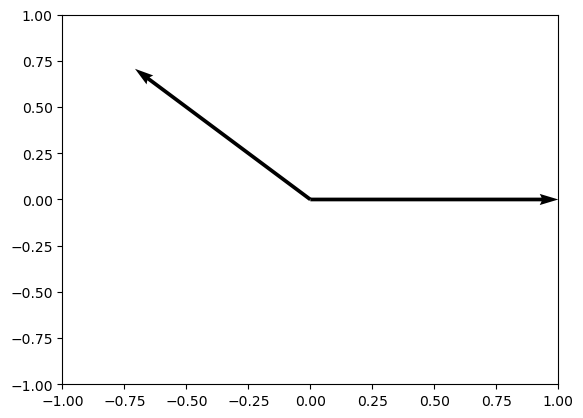

In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
%matplotlib inline

alpha = -3*jnp.pi / 4
G = jnp.array([
    [jnp.cos(alpha), -jnp.sin(alpha)],
    [jnp.sin(alpha), jnp.cos(alpha)]
])
x = jnp.array([-1./jnp.sqrt(2), 1./jnp.sqrt(2)])
y = G @ x

plt.quiver([0, 0], [0, 0], [x[0], y[0]], [x[1], y[1]], angles='xy', scale_units='xy', scale=1)
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)

## QR via Givens rotations

Similarly we can make matrix upper-triangular using Givens rotations:

$$\begin{bmatrix} \times & \times & \times \\ \bf{*} & \times & \times \\ \bf{*} & \times & \times \end{bmatrix} \to \begin{bmatrix} * & \times & \times \\ * & \times & \times \\ 0 & \times & \times \end{bmatrix} \to \begin{bmatrix} \times & \times & \times \\ 0 & * & \times \\ 0 & * & \times \end{bmatrix} \to \begin{bmatrix} \times & \times & \times \\ 0 & \times & \times \\ 0 & 0 & \times \end{bmatrix} $$

## Givens vs. Householder transformations

- Householder reflections are useful for dense matrices (complexity is $\approx$ twice smaller than for Jacobi) and we need to zero large number of elements.
- Givens rotations are more suitable for sparse matrice or parallel machines as they act locally on elements.

## Singular Value Decomposition

SVD will be considered later in more details.

**Theorem.** Any matrix $A\in \mathbb{C}^{n\times m}$ can be written as a product of three matrices:  

$$ A = U \Sigma V^*, $$

where 
- $U$ is an $n \times n$ unitary matrix
- $V$ is an $m \times m$ unitary matrix
- $\Sigma$ is a diagonal matrix with non-negative elements $\sigma_1 \geq  \ldots, \geq \sigma_{\min (m,n)}$ on the diagonal.

Moreover, if $\text{rank}(A) = r$, then $\sigma_{r+1} = \dots = \sigma_{\min (m,n)} = 0$.

See [poster](../../decompositions.pdf) for the visualization.

<img src="./svd_picture.png">

- **Important note:** if one truncates (replace by $0$) all singular values except for $r$ first, then the resulting matrix yields best rank-$r$ approximation both in $\|\cdot\|_2$ and $\|\cdot\|_F$. 
- This is called Eckart-Young theorem and will be proved later in our course.

## Summary 

- Most important matrix norms: Frobenius and spectral

- Unitary matrices preserve these norms

- There are two "basic" classes of unitary matrices: Householder and Givens matrices

## Questions?